In [1]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"
snap=650 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen

#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/sf-fire3/'
datapath="./"+simtype+"_data_pkl/" #this is teh path where the data of our tracked clusters is
gas_datapath="./"+simtype+"_gas_data_pkl/"


plot_path="./"+simtype+"_plots_with_gas/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)



############################
############################
#Doing all this trouble to store the initial mass of the clusters
fn_associations=simtype+"_associations_"+simname+"_snapshot_"+str(snap)+".pkl"  #snap determines where the cluster was taken from
fn_clusters=simtype+"_clusters_"+simname+"_snapshot_"+str(snap)+".pkl" 
with open(datapath+fn_associations, "rb") as input:
    association_data = pickle.load(input)

with open(datapath+fn_clusters, "rb") as input:
    cluster_data = pickle.load(input)
    
clustermass=[]   #it stores the mass of each cluster that was in the beginning

for c in range(len(cluster_data)):
    m=np.sum(cluster_data[c+1]["mtot"])
    clustermass.append(m)
print("These are the initial mass of each star in the cluster",clustermass)
############################
############################

print("########################## TEST: This is cluster data from first cluster",cluster_data[1])
print("####################### Total clusters present is",len(cluster_data))
print("####################### Total associations present is",len(association_data))
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

These are the initial mass of each star in the cluster [94423.125, 90358.2978515625, 37171.0576171875, 47442.3740234375, 36869.751953125, 50955.5146484375, 43492.63818359375, 50664.0185546875]
########################## TEST: This is cluster data from first cluster {'cluster_groupid': 1, 'no_of_star': 9, 'id': array([57985402, 13825809, 46015736, 49664520, 51924805, 56315901,
       50643340, 38934655, 30988704], dtype=uint32), 'id_children': array([0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint32), 'is_embedded': True, 'xcm': 11.878707129763374, 'ycm': -4.8819310023261036, 'zcm': 0.11740253066873504, 'mtot': 94423.125, 'r90': 0.005445430774540798, 'r50': 0.003884939574726055, 'rmax': 0.005776270440458906}
####################### Total clusters present is 8
####################### Total associations present is 26


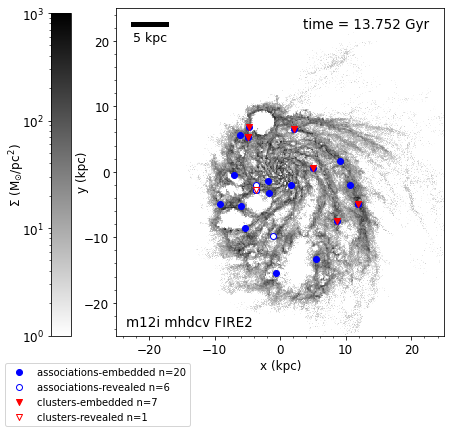

In [2]:

tracked_gas_all_snaps={}
snapnumber=snap
tracked_gas={} 
fig1=plt.figure()
fig1.set_size_inches(7,7)
ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height

#########################################
#########################################
association_count=0
n_ae=0
n_ar=0
n_ce=0
n_cr=0
for i in range(len(association_data)):                              
    x=association_data[association_count+1]["xcm"]
    y=association_data[association_count+1]["ycm"]
    embedded_check=association_data[association_count+1]["is_embedded"]
    if embedded_check==True:
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=colors[cluster_count])
        ae=ax.scatter(x,y,label="associations",c="blue")
        n_ae+=1
    else:
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',edgecolor=colors[cluster_count],facecolor="white")
        ar=ax.scatter(x,y,label="associations",edgecolor="blue",facecolor="white")
        n_ar+=1
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=next(colors)) #use this if no. of clusters is large
        #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    
    #time_label= 'time = ' + f'{snaptime:.3f}' + ' Gyr'
    #ax.set_title("Clusters at T="+str(time[plot_count])+" in Myr")
    #ax.set_title("Clusters at "+time_label)
    association_count+=1
    
############################################
############################################
cluster_count=0
for i in range(len(cluster_data)):                              
    x=cluster_data[cluster_count+1]["xcm"]
    y=cluster_data[cluster_count+1]["ycm"]
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    if embedded_check==True:
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=colors[cluster_count])
        ce=ax.scatter(x,y,label="clusters",marker="v",c="red")
        n_ce+=1
    else:
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',edgecolor=colors[cluster_count],facecolor="white")
        cr=ax.scatter(x,y,label="clusters",marker="v",edgecolor="red",facecolor="white")
        n_cr+=1
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=next(colors)) #use this if no. of clusters is large
        #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    
    #time_label= 'time = ' + f'{snaptime:.3f}' + ' Gyr'
    #ax.set_title("Clusters at T="+str(time[plot_count])+" in Myr")
    #ax.set_title("Clusters at "+time_label)
    cluster_count+=1
      
fig1.legend((ae,ar,ce,cr), ("associations-embedded n="+str(n_ae),"associations-revealed n="+str(n_ar),"clusters-embedded n="+str(n_ce),"clusters-revealed n="+str(n_cr)),"lower left") 


#handles,labels = ax.get_legend_handles_labels()
#ax.legend(handles,labels,bbox_to_anchor=(1,0.5), loc='center left')
ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12,labelpad=3)
ax.set_ylabel("y (kpc)",fontsize=12,labelpad=-5)   
    
file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)   
v=import_gasdata["v"]
face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
    

#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig1.add_axes([0.04, 0.185, 0.04, 0.64]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
#plot a scale bar 5 kpc long
ax.plot([-22.5,-17.5], [22.5,22.5], 'k-', linewidth=5)
label1 = "5 kpc"
ax.text(-22.5, 20, label1, fontsize=12.5)
    
#label the name of the galaxy on plot 
#label_simname="m12i mhdcv"
#ax.text(10,-23.5,label_simname,fontsize=13.5)
label2="m12i mhdcv "+simtype.upper() 
ax.text(-23.5,-23.5,label2,fontsize=13.5) 
    
#label the time from the snapshot_times.txt file
label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
ax.text(3.5,22,label3,fontsize=13.5) #display at the top right  
#ax.text(-23.5,-21,label3,fontsize=13.5) #display time on the bottom left above simtype
plot_name=simtype+"_m12i_gas_clusters_and_associations"+str(snap)+".png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
print("Generated the plot and saved the figure as: ",plot_name,end="\r",flush=True)
#print("###################\n")
#fig1.clf()
#plt.tight_layout()

plt.show()